# Pauli Gates

## X-gate

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

\begin{eqnarray}
  X &=& \ket{0}\bra{1} + \ket{1}\bra{0}
  \\ &=&
  \begin{bmatrix}
    1 \\
    0
  \end{bmatrix}
  \begin{bmatrix}
    0 & 1
  \end{bmatrix} +
  \begin{bmatrix}
    0 \\
    1
  \end{bmatrix}
  \begin{bmatrix}
    1 & 0
  \end{bmatrix}
  \\ &=&
  \begin{bmatrix}
    0 & 1 \\ 
    0 & 0
  \end{bmatrix} +
  \begin{bmatrix}
    0 & 0\\
    1 & 0
  \end{bmatrix}
  \\ &=&
  \begin{bmatrix}
    0 & 1\\
    1 & 0
  \end{bmatrix}
\end{eqnarray}

**References**

1. [Equation alignment in LaTeX](https://www-users.york.ac.uk/~pjh503/LaTeX/equations.html)
2. [Qiskit Docs | AerProvider.get_backend](https://qiskit.org/documentation/aer/stubs/qiskit_aer.AerProvider.get_backend.html#aerprovider-get-backend)
3. [Qiskit Docs | QuantumCircuit](https://qiskit.org/documentation/stable/0.39/stubs/qiskit.circuit.QuantumCircuit.html#quantumcircuit)
4. [Qiskit Docs | QuantumCircuit.x](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.x.html)

In [1]:
from qiskit import Aer, QuantumCircuit, assemble, execute
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

backend = Aer.get_backend(name="aer_simulator")
qc = QuantumCircuit(1)
qc.x(qubit=0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

**References:**

1. [StackExchange Quantum Computing | Type Error while executing a job using Qiskit](https://quantumcomputing.stackexchange.com/questions/31708/type-error-while-executing-a-job-using-qiskit?newreg=5c134ccddb1644ecb0b97b64e1d9c755#comment42059_31708)
2. [Qiskit Docs | qiskit.execute](https://qiskit.org/documentation/stable/0.24/apidoc/execute.html#executing-experiments-qiskit-execute)
3. [Qiskit Docs | qiskit.visualization.plot_bloch_multivector](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_multivector.html#qiskit-visualization-plot-bloch-multivector)

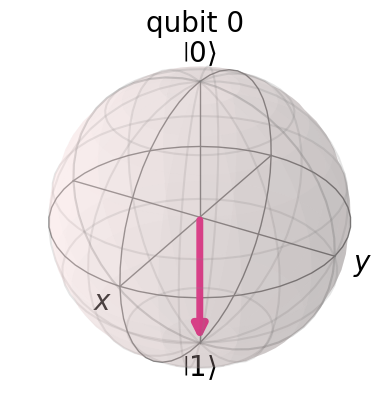

In [2]:
qc.save_statevector()
state = execute(experiments=qc, backend=backend).result().get_statevector()
plot_bloch_multivector(state=state)

## Y-gate

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

\begin{eqnarray}
  Y &=& -i\ket{0}\bra{1} + i\ket{1}\bra{0}
  \\ &=&
  -i\begin{bmatrix}
    0 & 1 \\ 
    0 & 0
  \end{bmatrix} +
  i\begin{bmatrix}
    0 & 0\\
    1 & 0
  \end{bmatrix}
  \\ &=&
  \begin{bmatrix}
    0 & -i\\
    i & 0
  \end{bmatrix}
\end{eqnarray}

\begin{eqnarray}
  Z &=& \ket{0}\bra{0} - \ket{1}\bra{1}
  \\ &=&
  \begin{bmatrix}
    1 \\
    0
  \end{bmatrix}
  \begin{bmatrix}
    1 & 0
  \end{bmatrix} -
  \begin{bmatrix}
    0 \\
    1
  \end{bmatrix}
  \begin{bmatrix}
    0 & 1
  \end{bmatrix}
  \\ &=&
  \begin{bmatrix}
    1 & 0 \\ 
    0 & 0
  \end{bmatrix} -
  \begin{bmatrix}
    0 & 0\\
    0 & 1
  \end{bmatrix}
  \\ &=&
  \begin{bmatrix}
    1 & 0\\
    0 & -1
  \end{bmatrix}
\end{eqnarray}

**Notes**

- Need to install `qiskit-textbook` following the instructions [here [1]](https://github.com/qiskit-community/qiskit-textbook#installing-the-qiskit_textbook-package)

**References**

1. [GitHub | qiskit-textbook Installation](https://github.com/qiskit-community/qiskit-textbook#installing-the-qiskit_textbook-package)

In [3]:
from qiskit_textbook.widgets import gate_demo

gate_demo(gates="pauli")

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

In [4]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw()

┌───┐ statevector ┌───┐┌───┐
q: ┤ X ├──────░──────┤ Y ├┤ Z ├
   └───┘      ░      └───┘└───┘

In [5]:
gate_demo(gates="pauli+h")

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

# Measuring in Different Bases

In [2]:
import math
from qiskit import QuantumCircuit

def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [
    1 / math.sqrt(2),
    -1 / math.sqrt(2),
]
qc = QuantumCircuit(1, 1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0) # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

\begin{eqnarray}
HZH &=& \frac{1}{\sqrt{2}}
\begin{bmatrix}
  1 & 1\\
  1 & -1
\end{bmatrix}
\begin{bmatrix}
  1 & 0\\
  0 & -1
\end{bmatrix}
\frac{1}{\sqrt{2}}
\begin{bmatrix}
  1 & 1\\
  1 & -1
\end{bmatrix} \\
&=& \frac{1}{2}
\begin{bmatrix}
  1 & -1\\
  1 & 1
\end{bmatrix}
\begin{bmatrix}
  1 & 1\\
  1 & -1
\end{bmatrix} \\
&=& \frac{1}{\sqrt{2}}
\begin{bmatrix}
  0 & 2\\
  2 & 0
\end{bmatrix} \\
&=&
\begin{bmatrix}
  0 & 1\\
  1 & 0
\end{bmatrix} \\
&=& X \\
\ket{+} &=& \frac{1}{\sqrt{2}}(\ket{0}+\ket{1}) = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\ 1
\end{bmatrix} \\
\ket{-} &=& \frac{1}{\sqrt{2}}(\ket{0}-\ket{1}) = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\ -1
\end{bmatrix}
\end{eqnarray}